# Importing the modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing the datasets

In [2]:
df1 = pd.read_csv('who.csv')

In [3]:
df1.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24T00:00:00Z,AF,Afghanistan,EMRO,1,1,0,0
1,2020-02-25T00:00:00Z,AF,Afghanistan,EMRO,0,1,0,0
2,2020-02-26T00:00:00Z,AF,Afghanistan,EMRO,0,1,0,0
3,2020-02-27T00:00:00Z,AF,Afghanistan,EMRO,0,1,0,0
4,2020-02-28T00:00:00Z,AF,Afghanistan,EMRO,0,1,0,0


## Defining the shape

In [4]:
df1.shape

(20430, 8)

## Checking for missing values

In [5]:
df1.isnull().sum()

Date_reported          0
Country_code          87
Country                0
WHO_region           125
New_cases              0
Cumulative_cases       0
New_deaths             0
Cumulative_deaths      0
dtype: int64

## Extracting the information

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20430 entries, 0 to 20429
Data columns (total 8 columns):
Date_reported        20430 non-null object
Country_code         20343 non-null object
Country              20430 non-null object
WHO_region           20305 non-null object
New_cases            20430 non-null int64
Cumulative_cases     20430 non-null int64
New_deaths           20430 non-null int64
Cumulative_deaths    20430 non-null int64
dtypes: int64(4), object(4)
memory usage: 1.2+ MB


## Describing the statistics

In [7]:
df1.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,20430.000000,2.043000e+04,20430.000000,20430.000000
mean,339.255996,1.273726e+04,19.620999,818.882868
std,1908.952841,7.802861e+04,135.300229,5214.199169
min,-2461.000000,1.000000e+00,-1918.000000,0.000000
25%,0.000000,1.900000e+01,0.000000,0.000000
50%,4.000000,2.380000e+02,0.000000,5.000000
75%,65.000000,2.080750e+03,1.000000,48.000000
max,38509.000000,1.915712e+06,6409.000000,109746.000000


# Extracting only European region data

In [8]:
df_f = df1.loc[df1['WHO_region'] == 'EURO']

In [9]:
df_f.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
106,2020-03-09T00:00:00Z,AL,Albania,EURO,2,2,0,0
107,2020-03-10T00:00:00Z,AL,Albania,EURO,4,6,0,0
108,2020-03-11T00:00:00Z,AL,Albania,EURO,4,10,0,0
109,2020-03-12T00:00:00Z,AL,Albania,EURO,13,23,0,0
110,2020-03-13T00:00:00Z,AL,Albania,EURO,10,33,1,1


## Checking the shape

In [10]:
df_f.shape

(6163, 8)

## Checking for missing value

In [11]:
df_f.isnull().sum()

Date_reported        0
Country_code         0
Country              0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

## Finding the statistics of the covid data for European region

In [12]:
df_f.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,6163.000000,6163.000000,6163.000000,6163.000000
mean,371.014117,17449.465682,29.875061,1497.626318
std,1182.703184,49546.609201,129.305612,5416.890118
min,-840.000000,1.000000,-1918.000000,0.000000
25%,1.000000,122.000000,0.000000,0.000000
50%,21.000000,1007.000000,0.000000,21.000000
75%,161.000000,7274.500000,5.000000,200.500000
max,12559.000000,476658.000000,4419.000000,40542.000000


We can see the minimum for New_cases and New_deaths are showing negative. We feel there must be something with data.

## Listing the columns of our data.

In [13]:
df_f.columns.tolist()

['Date_reported',
 'Country_code',
 'Country',
 'WHO_region',
 'New_cases',
 'Cumulative_cases',
 'New_deaths',
 'Cumulative_deaths']

## Extracting the information of the dataframe

In [14]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6163 entries, 106 to 19981
Data columns (total 8 columns):
Date_reported        6163 non-null object
Country_code         6163 non-null object
Country              6163 non-null object
WHO_region           6163 non-null object
New_cases            6163 non-null int64
Cumulative_cases     6163 non-null int64
New_deaths           6163 non-null int64
Cumulative_deaths    6163 non-null int64
dtypes: int64(4), object(4)
memory usage: 433.3+ KB


Date column is not in Datetime format

## Changing Date reported data type

From the data info, we see our "Date_reported" is in object format. We need to convert this to datetime64[ns] format. We also dropped few columns since we don't need them.

In [15]:
df_f['Date'] = pd.to_datetime(df_f['Date_reported'])
df_f['Date'] = pd.to_datetime(df_f['Date'].dt.date)
df_f=df_f.drop(["Country_code", "WHO_region", "Date_reported"],axis=1)
df_f.head()

/home/smruti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/smruti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date
106,Albania,2,2,0,0,2020-03-09
107,Albania,4,6,0,0,2020-03-10
108,Albania,4,10,0,0,2020-03-11
109,Albania,13,23,0,0,2020-03-12
110,Albania,10,33,1,1,2020-03-13


## Creating Month column and adding it to dataframe

In [16]:
df_f['Month'] = pd.to_datetime(df_f.Date).dt.strftime('%b')
df_f.head()

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Month
106,Albania,2,2,0,0,2020-03-09,Mar
107,Albania,4,6,0,0,2020-03-10,Mar
108,Albania,4,10,0,0,2020-03-11,Mar
109,Albania,13,23,0,0,2020-03-12,Mar
110,Albania,10,33,1,1,2020-03-13,Mar


## Checking the information of final working data set

In [17]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6163 entries, 106 to 19981
Data columns (total 7 columns):
Country              6163 non-null object
New_cases            6163 non-null int64
Cumulative_cases     6163 non-null int64
New_deaths           6163 non-null int64
Cumulative_deaths    6163 non-null int64
Date                 6163 non-null datetime64[ns]
Month                6163 non-null object
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 385.2+ KB


Here we can see that the date column is in correct format. Hence we can progress with our analysis.

## Sorting the data by "Date"

In [18]:
df_f.sort_values("Date",ascending=True,inplace=True)
df_f.head()

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Month
6440,France,3,3,0,0,2020-01-24,Jan
6441,France,0,3,0,0,2020-01-25,Jan
6442,France,0,3,0,0,2020-01-26,Jan
6443,France,0,3,0,0,2020-01-27,Jan
6444,France,1,4,0,0,2020-01-28,Jan


We see the first case happended on 24th Jan, 2020 in France. The number of new reported cases is 3.

# Analysis on the final dataframe

## Sorting country according to the new cases

In [19]:
df_f.groupby(['Country']).New_cases.sum().sort_values(ascending=False)

Country
Russian Federation        476658
The United Kingdom        286198
Spain                     241550
Italy                     234998
Germany                   184193
Turkey                    170132
France                    150315
Belgium                    59226
Belarus                    48630
Netherlands                47574
Sweden                     44730
Portugal                   34493
Switzerland                30882
Ukraine                    27462
Poland                     26561
Ireland                    25201
Romania                    20479
Israel                     17783
Austria                    16868
Armenia                    13325
Kazakhstan                 12859
Denmark                    11948
Serbia                     11823
Republic of Moldova         9700
Czechia                     9628
Norway                      8504
Azerbaijan                  7553
Finland                     6981
Tajikistan                  4529
Uzbekistan                  4352
  

## Sorting country according to the new deaths

In [20]:
df_f.groupby(['Country']).New_deaths.sum().sort_values(ascending=False)

Country
The United Kingdom        40542
Italy                     33899
France                    29097
Spain                     27136
Belgium                    9595
Germany                    8674
Netherlands                6013
Russian Federation         5971
Turkey                     4692
Sweden                     4659
Ireland                    1679
Switzerland                1660
Portugal                   1479
Romania                    1326
Poland                     1157
Ukraine                     797
Austria                     672
Denmark                     589
Hungary                     542
Republic of Moldova         346
Czechia                     327
Finland                     323
Israel                      294
Belarus                     269
Serbia                      249
Norway                      238
Armenia                     211
Greece                      180
Bulgaria                    160
Bosnia and Herzegovina      159
                          ...  


## Determining the full information of the country with single day most new cases

In [21]:
df_f.sort_values('New_cases',ascending=False)[0:1]

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Month
15682,Russian Federation,12559,87147,113,794,2020-04-27,Apr


## Determining the full information of the country with single day most new deaths

In [22]:
df_f.sort_values('New_deaths',ascending=False)[0:1]

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Month
18619,The United Kingdom,4076,165225,4419,26097,2020-04-30,Apr


## Determining the full information of the country with minimum new cases

In [23]:
df_f.sort_values('New_cases',ascending=True)[0:10]

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Month
6571,France,-840,147935,107,28883,2020-06-03,Jun
18640,The United Kingdom,-525,248297,363,35704,2020-05-21,May
17708,Spain,-372,235400,-1918,26834,2020-05-26,May
14942,Portugal,-161,25190,16,1023,2020-05-03,May
11052,Lithuania,-105,1344,3,44,2020-04-29,Apr
9393,Israel,-1,16607,3,271,2020-05-18,May
10946,Liechtenstein,0,82,0,1,2020-04-25,Apr
7494,Greenland,0,11,0,0,2020-04-25,Apr
9864,Jersey,0,308,0,29,2020-05-30,May
7880,Guernsey,0,1,0,0,2020-03-15,Mar


## Determining the full information of the country with minimum new deaths

In [24]:
df_f.sort_values('New_deaths',ascending=True)[0:10]

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Month
17708,Spain,-372,235400,-1918,26834,2020-05-26,May
17718,Spain,334,240660,-807,27133,2020-06-05,Jun
6557,France,462,140959,-218,27972,2020-05-20,May
4744,Cyprus,2,905,-6,17,2020-05-14,May
5036,Denmark,78,10591,-6,527,2020-05-13,May
9211,Ireland,59,24698,-2,1606,2020-05-26,May
4849,Czechia,111,8586,-1,297,2020-05-19,May
6181,Faroe Islands,0,187,0,0,2020-04-25,Apr
10556,Latvia,20,804,0,12,2020-04-26,Apr
12249,Monaco,0,68,0,1,2020-04-26,Apr


The above two shows value in negative which is not possible for number of deaths and cases. Hence we can say that there is some anomaly in the data.

# Total Cases

Here we have taken full EU countries data and tried to do some basic analysis.

## Coorelation between Cumulative cases and  Cumulative deaths

In [25]:
df_f.Cumulative_cases.corr(df_f.Cumulative_deaths)

0.8104457935775454

## plotting in heatmap

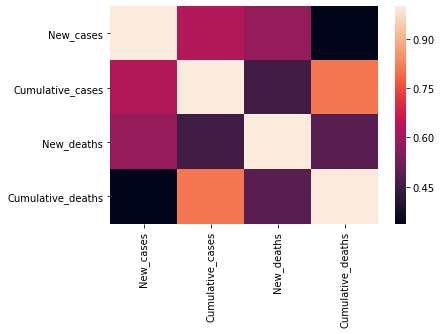

In [26]:
corr =df_f.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns);

## Determing the coorelation between the new cases and death

In [27]:
corrMatrix=np.corrcoef(df_f['New_cases'],df_f['New_deaths'])
corrMatrix

array([[1.        , 0.58351381],
       [0.58351381, 1.        ]])

## Plotting the heatmap

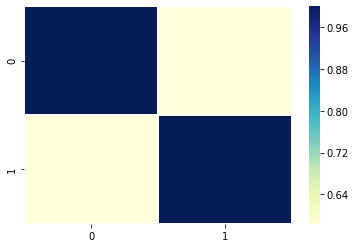

In [28]:
sns.heatmap(corrMatrix,  linewidths=.5, cmap="YlGnBu");

The above concludes that although the co-relation between the cumulative values is high but the new cases and death have low co-relation.

## Total new cases and deaths for each country

In [29]:
df_total = df_f.groupby('Country')['New_cases', 'New_deaths'].sum().sort_values('New_cases',
                                                                        ascending = False)
df_total.head()

,New_cases,New_deaths
Country,,
Russian Federation,476658,5971
The United Kingdom,286198,40542
Spain,241550,27136
Italy,234998,33899
Germany,184193,8674


## The mean death and cases

In [30]:
df_mean = df_f.groupby('Country')['New_cases', 'New_deaths'].mean().sort_values('New_cases',
                                                                 ascending = False)
df_mean.head()

,New_cases,New_deaths
Country,,
Russian Federation,3666.600000,45.930769
The United Kingdom,2201.523077,311.861538
Turkey,1890.355556,52.133333
Spain,1858.076923,208.738462
Italy,1780.287879,256.810606


Why Turkey is coming third.

## Plotting the bar graph of mean cases

In [31]:
df_mean.reset_index(inplace = True)

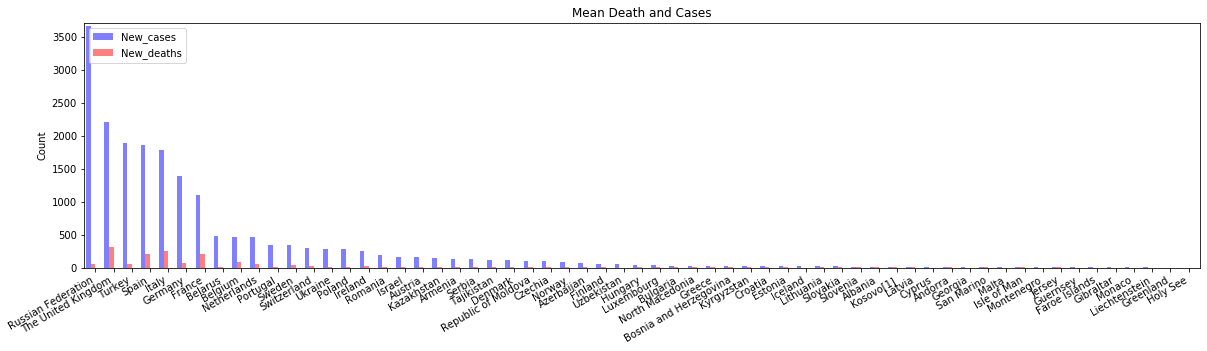

In [32]:
# Setting the positions and width for the bars
pos = list(range(len(df_mean['New_cases']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(20,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos, 
        #using df['pre_score'] data,
        df_mean['New_cases'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='blue', 
        # with label the first value in first_name
        label=df_mean['Country'][0]) 

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df_mean['New_deaths'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='red', 
        # with label the second value in first_name
        label=df_mean['Country'][1])  

# Set the y axis label
ax.set_ylabel('Count')

# Set the chart's title
ax.set_title('Mean Death and Cases')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_mean['Country'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df_mean['New_cases'] + df_mean['New_deaths'] )] )

# Adding the legend and showing the plot
plt.legend(['New_cases', 'New_deaths'], loc='upper left')
fig.autofmt_xdate()
plt.show()

## Checking if there are countries with no deaths

In [33]:
summing = df_f.groupby('Country').sum()
summing[summing.Cumulative_deaths == 0]

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,,,,
Faroe Islands,187,14530,0,0
Gibraltar,175,9986,0,0
Greenland,13,849,0,0
Holy See,12,752,0,0


We can see that according to our data above countries has no death reported. Here we took cumulative death as it will show the total death in the time period.

## First death in different countries

In [34]:
first_analysis = df_f[['Country','Cumulative_cases', 'Cumulative_deaths', 'Date']]

In [35]:
first_deaths = first_analysis[first_analysis.Cumulative_deaths != 0].groupby('Country').min()
first_deaths.head()

,Cumulative_cases,Cumulative_deaths,Date
Country,,,
Albania,33,1,2020-03-13
Andorra,164,1,2020-03-24
Armenia,329,1,2020-03-27
Austria,361,1,2020-03-12
Azerbaijan,34,1,2020-03-18


The above table shows that although the cumulative cases were already high for countries but death appear relatively late.

## Information of the country with first death.

In [36]:
first_deaths.sort_values('Date').iloc[0]

Cumulative_cases                      11
Cumulative_deaths                      1
Date                 2020-02-15 00:00:00
Name: France, dtype: object

From here we can see that first death occour at France on Feburary 15.

## Cumulative cases and Deaths for each country

In [37]:
df_f[["Country","Cumulative_cases", 'Cumulative_deaths']].groupby('Country').max().head()

,Cumulative_cases,Cumulative_deaths
Country,,
Albania,1263,34
Andorra,852,51
Armenia,13325,211
Austria,16868,672
Azerbaijan,7553,88


## Cases and deaths over all the european countries all together

In [38]:
total_case = df_f["New_cases"].sum()
total_case

2286560

In [39]:
total_death = df_f["New_deaths"].sum()
total_death

184120

## Calculating the percentage of death over all the cases

In [40]:
mortality_rate = total_death / total_case
mortality_rate * 100

8.052270659855854

From the data we can see that the total mortality rate for all the europe is 8.05 %

## Summing the case data grouped according to date for all countries

In [41]:
data_daily_cases=df_f["New_cases"].groupby(df_f['Date']).sum()
data_daily_cases.head()

Date
2020-01-24    3
2020-01-25    0
2020-01-26    0
2020-01-27    0
2020-01-28    5
Name: New_cases, dtype: int64

## Plotting the above observation

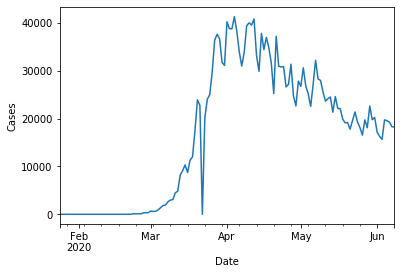

In [42]:
fig, ax = plt.subplots()
data_daily_cases.plot.line()
ax.set(xlabel="Date", ylabel="Cases");

## Summing the death data grouped according to date for all countries 

In [43]:
data_daily_deaths=df_f["New_deaths"].groupby(df_f['Date']).sum()
data_daily_deaths.head()

Date
2020-01-24    0
2020-01-25    0
2020-01-26    0
2020-01-27    0
2020-01-28    0
Name: New_deaths, dtype: int64

## Plotting the above observation

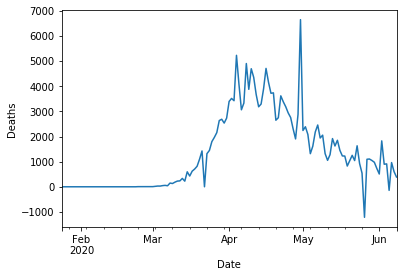

In [44]:
fig, ax = plt.subplots()
data_daily_deaths.plot.line()
ax.set(xlabel="Date", ylabel="Deaths");

From the above figure we can see that death is negative which is not right. Also we can say that the increase the in death cases are from mid of March but the cases already starts from end of Feb.

# Generating the monthly basis report

The above table is very large and not giving the clear undestanding. Thus the data is compressed to monthly basis.

## Resampling according to the month

In [45]:
df_month = df_f[['New_cases', 'New_deaths', 'Date']].resample('M', on='Date').sum()
df_month

,New_cases,New_deaths
Date,,
2020-01-31,22,0
2020-02-29,1425,31
2020-03-31,422484,26663
2020-04-30,1010709,109267
2020-05-31,707594,42205
2020-06-30,144326,5954


## Generating the information

In [46]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2020-01-31 to 2020-06-30
Freq: M
Data columns (total 2 columns):
New_cases     6 non-null int64
New_deaths    6 non-null int64
dtypes: int64(2)
memory usage: 144.0 bytes


## Plotting the monthly data

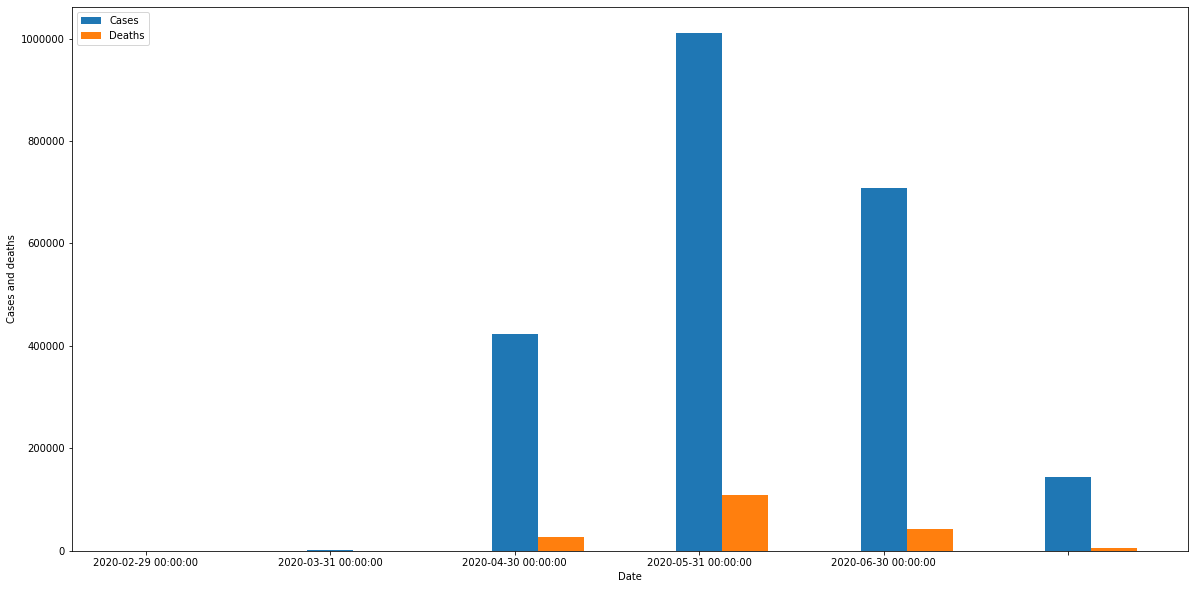

In [47]:
fig, ax = plt.subplots(figsize=(20,10))

pos = list(range(len(df_month['New_deaths']))) 
width = 0.25 
plt.bar(x=pos,height=df_month["New_cases"],width=width)
plt.bar([p + width for p in pos],df_month["New_deaths"],width)

ax.set(xlabel="Date", ylabel="Cases and deaths")
plt.legend(['Cases', 'Deaths'], loc='upper left')
ax.set_xticklabels(df_month.index);

## Grouping the countries according to the month

In [48]:
df_f.groupby('Country').resample('M', on = 'Date').sum()

New_cases  Cumulative_cases  New_deaths  \
Country            Date                                                  
Albania            2020-03-31        223              2184          11   
                   2020-04-30        550             15316          20   
                   2020-05-31        363             28775           2   
                   2020-06-30        127              9633           1   
Andorra            2020-03-31        370              2642           8   
                   2020-04-30        374             18871          33   
                   2020-05-31         20             23493          10   
                   2020-06-30         88              6632           0   
Armenia            2020-03-31        482              3889           3   
                   2020-04-30       1584             35395          29   
                   2020-05-31       7216            151421          99   
                   2020-06-30       4043             91882          80   
Austria            2020-02-29         10                23           0   
                   2020-03-31       9608             78433         108   
                   2020-04-30       5746            411674         472   
                   2020-05-31       1274            497279          88   
                   2020-06-30        230            133918           4   
Azerbaijan         2020-02-29          3                 3           0   
                   2020-03-31        270              1604           4   
                   2020-04-30       1493             33838          19   
                   2020-05-31       3480             97870          38   
                   2020-06-30       2307             51525          27   
Belarus            2020-02-29          1                 2           0   
                   2020-03-31        151              1410           0   
                   2020-04-30      13029            135514          84   
                   2020-05-31      28477            866765         145   
                   2020-06-30       6972            363677          40   
Belgium            2020-02-29          1                26           0   
                   2020-03-31      11898             79267         513   
                   2020-04-30      35960            957869        6988   
...                                  ...               ...         ...   
Sweden             2020-02-29         12                58           0   
                   2020-03-31       4015             40770         146   
                   2020-04-30      16274            361351        2316   
                   2020-05-31      16811            895471        1933   
                   2020-06-30       7617            328187         264   
Switzerland        2020-02-29         18                36           0   
                   2020-03-31      15394            135911         295   
                   2020-04-30      13912            750289        1112   
                   2020-05-31       1438            940183         249   
                   2020-06-30        120            246606           4   
Tajikistan         2020-05-31       3807             47494          47   
                   2020-06-30        722             33875           1   
The United Kingdom 2020-01-31          2                 2           0   
                   2020-02-29         21               249           0   
                   2020-03-31      22122            144433        1408   
                   2020-04-30     143080           2863136       24689   
                   2020-05-31     107605           7162092       12279   
                   2020-06-30      13368           2245001        2166   
Turkey             2020-03-31      10827             46954         168   
                   2020-04-30     106762           1991534        2913   
                   2020-05-31      45514           4477971        1434   
                   2020-06-30      

## Statistics of monthly cases and deaths

In [49]:
month_describe = df_month.describe()
month_describe

,New_cases,New_deaths
count,6.000000e+00,6.000000
mean,3.810933e+05,30686.666667
std,4.123479e+05,41992.563373
min,2.200000e+01,0.000000
25%,3.715025e+04,1511.750000
50%,2.834050e+05,16308.500000
75%,6.363165e+05,38319.500000
max,1.010709e+06,109267.000000


## Calculating the co-relation between the deaths and cases

In [50]:
cases_corr = df_month.corr()
cases_corr

,New_cases,New_deaths
New_cases,1.000000,0.950109
New_deaths,0.950109,1.000000


In [51]:
heat_map = cases_corr.style.background_gradient(cmap= "Blues")
heat_map

,New_cases,New_deaths
New_cases,1,0.950109
New_deaths,0.950109,1


## Showing the cases and deaths density for particular month.

In [52]:
cm = sns.light_palette("red", as_cmap=True)

month = df_month.style.background_gradient(cmap=cm)
month

,New_cases,New_deaths
Date,,
2020-01-31 00:00:00,22,0
2020-02-29 00:00:00,1425,31
2020-03-31 00:00:00,422484,26663
2020-04-30 00:00:00,1010709,109267
2020-05-31 00:00:00,707594,42205
2020-06-30 00:00:00,144326,5954


From the above heatmap we can see that the most affected month is April. Now let us see what country is affected at what rate in the month of April.

## The April month analysis for countries

In [53]:
df_month_country = df_f.loc[df_f['Month'] == 'Apr']

In [54]:
df_month_country_ana = df_month_country.groupby('Country')['New_cases',
                'New_deaths'].sum().sort_values('New_cases', ascending = False)
df_month_country_ana.head()

,New_cases,New_deaths
Country,,
The United Kingdom,143080,24689
Spain,127722,16935
Turkey,106762,2913
Russian Federation,104661,1064
Italy,101852,16091


## Extracting cases and deaths data for May for each country.

In [55]:
data  = df_f[['Date', "Country","New_cases","New_deaths"]]
data.set_index('Date', inplace = True)
data_may=df_f[data.index.month.isin([5])]
data_may.groupby("Country").resample('M', on = 'Date').sum().sort_values('New_cases',
                                                            ascending = False).head()

,,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Country,Date,,,,
Russian Federation,2020-05-31,299345,8257093,3620,82313
The United Kingdom,2020-05-31,107605,7162092,12279,1036590
Turkey,2020-05-31,45514,4477971,1434,122997
Italy,2020-05-31,29073,6887329,5658,968137
Belarus,2020-05-31,28477,866765,145,4879


From above two dataframes we can say that the cases in May are less than April except for few countries.

## Describing the dataframe

In [56]:
df_month_country_ana.describe()

,New_cases,New_deaths
count,60.000000,60.000000
mean,16845.150000,1821.116667
std,35123.063322,5066.845985
min,1.000000,0.000000
25%,530.750000,15.750000
50%,1538.500000,63.500000
75%,10676.500000,502.250000
max,143080.000000,24689.000000


## Styling the dataframe according to number of cases and death

In [57]:
df_month_country_ana.style.bar(subset=['New_cases', 'New_deaths'], color='Red')

,New_cases,New_deaths
Country,,
The United Kingdom,143080,24689
Spain,127722,16935
Turkey,106762,2913
Russian Federation,104661,1064
Italy,101852,16091
Germany,97206,5705
France,83089,21037
Belgium,35960,6988
Netherlands,27052,3847


1. The United Kingdom is the most affected country in the month of April with the death and cases being maximum among all.
2. The least affected countries is Greenland with cases as 1.

From above we can see that the maximum cases were at the month of April. However this still does not specify the more accurate date. Thus we can resample the data on the weekly basis.

# Weekly Basis

## Resampling the data according to the week

In [58]:
df_week = df_f.resample('W', on='Date').sum()
df_week

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date,,,,
2020-01-26,3,9,0,0
2020-02-02,22,105,0,0
2020-02-09,14,219,0,0
2020-02-16,8,319,1,2
2020-02-23,126,466,2,11
2020-03-01,1963,6618,34,145
2020-03-08,9887,44924,366,1281
2020-03-15,43047,218418,1927,8947
2020-03-22,96247,761812,5095,35966


In [59]:
(df_week.style.background_gradient(cmap='viridis', low=.5, high=0))

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date,,,,
2020-01-26 00:00:00,3,9,0,0
2020-02-02 00:00:00,22,105,0,0
2020-02-09 00:00:00,14,219,0,0
2020-02-16 00:00:00,8,319,1,2
2020-02-23 00:00:00,126,466,2,11
2020-03-01 00:00:00,1963,6618,34,145
2020-03-08 00:00:00,9887,44924,366,1281
2020-03-15 00:00:00,43047,218418,1927,8947
2020-03-22 00:00:00,96247,761812,5095,35966


If we see closely we can see that the intensity of max cases and death are skewed. That is the week having maximum death is later to the week having maximum cases.

In [60]:
df_week.style.bar(subset=['New_cases', 'New_deaths'], color='magenta')

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date,,,,
2020-01-26 00:00:00,3,9,0,0
2020-02-02 00:00:00,22,105,0,0
2020-02-09 00:00:00,14,219,0,0
2020-02-16 00:00:00,8,319,1,2
2020-02-23 00:00:00,126,466,2,11
2020-03-01 00:00:00,1963,6618,34,145
2020-03-08 00:00:00,9887,44924,366,1281
2020-03-15 00:00:00,43047,218418,1927,8947
2020-03-22 00:00:00,96247,761812,5095,35966


## Grouping the countries according to the week.

In [61]:
df_f.groupby('Country').resample('w', on = 'Date').sum()

New_cases  Cumulative_cases  New_deaths  \
Country    Date                                                  
Albania    2020-03-15         42               154           1   
           2020-03-22         34               457           1   
           2020-03-29        136              1127           8   
           2020-04-05        121              1909           8   
           2020-04-12        113              2841           5   
           2020-04-19        102              3504           3   
           2020-04-26        164              4507           1   
           2020-05-03         83              5358           4   
           2020-05-10         73              5861           0   
           2020-05-17         78              6273           0   
           2020-05-24         43              6768           1   
           2020-05-31        147              7516           1   
           2020-06-07        110              8370           1   
           2020-06-14         17              1263           0   
Andorra    2020-03-08          1                 7           0   
           2020-03-15          1                10           0   
           2020-03-22         86               395           0   
           2020-03-29        233              1519           4   
           2020-04-05        145              2820          13   
           2020-04-12        156              3993          11   
           2020-04-19         82              4723           7   
           2020-04-26         34              5079           5   
           2020-05-03          9              5206           4   
           2020-05-10          7              5263           4   
           2020-05-17          7              5315           3   
           2020-05-24          2              5332           0   
           2020-05-31          1              5344           0   
           2020-06-07         88              5780           0   
           2020-06-14          0               852           0   
Armenia    2020-03-01          1                 1           0   
...                          ...               ...         ...   
Turkey     2020-06-07       6115           1165656         154   
           2020-06-14        914            170132          23   
Ukraine    2020-03-08          1                 6           0   
           2020-03-15          2                13           1   
           2020-03-22         44               171           2   
           2020-03-29        371              1347           6   
           2020-04-05        833              5836          23   
           2020-04-12       1526             13832          51   
           2020-04-19       2672             29617          58   
           2020-04-26       3168             49986          68   
           2020-05-03       3296             72876          79   
           2020-05-10       3319             96040         103   
           2020-05-17       3059            118422         123   
           2020-05-24       2695            138142         103   
           2020-05-31       2686            156803          91   
           2020-06-07       3327            178063          80   
           2020-06-14        463             27462           9   
Uzbekistan 2020-03-22         33               156           0   
           2020-03-29        100               527           2   
           2020-04-05        165              1417           0   
           2020-04-12        498              3995           1   
           2020-04-19        699              8838           2   
           2020-04-26        370             12074           3   
           2020-05-03        262             14064           1   
           2020-05-10        260             15869           1   
           2020-05-17        354             18222           1   
           2020-05-24        391             20610           2   
           2020-05-31        422             23700           1 

## Plotting the number of cases and death on weekly basis

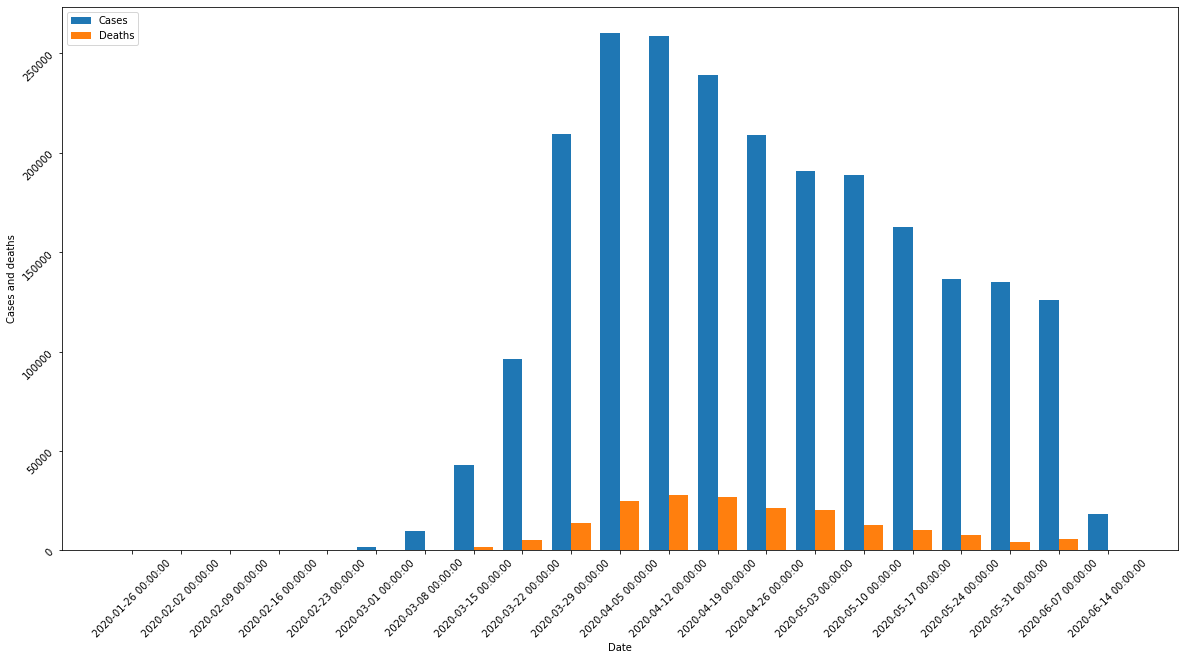

In [62]:
fig, ax = plt.subplots(figsize=(20,10))

pos = list(range(len(df_week['New_cases']))) 
width = 0.4 
plt.bar(x=pos,height=df_week["New_cases"],width=width)
plt.bar([p + width for p in pos],df_week["New_deaths"],width)
plt.tick_params(labelrotation =45)
# Set the position of the x ticks
ax.set_xticks([p + 0.5* width for p in pos])
# Set the labels for the x ticks
ax.set_xticklabels(df_week['New_cases'])

ax.set(xlabel="Date", ylabel="Cases and deaths")
plt.legend(['Cases', 'Deaths'], loc='upper left')
ax.set_xticklabels(df_week.index);

from the above we can see that first and second week of the april month shows the peak for the cases and deaths respectively. To do detail analysis of April let's breakdown the month to days.

1. Skewed
2. Mortality rate

# Analysis of United kingdom

## Extracting the covid data only for UK

In [63]:
df_UK = df_f.loc[df_f['Country'] == 'The United Kingdom']
df_UK.head()

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Month
18529,The United Kingdom,2,2,0,0,2020-01-31,Jan
18530,The United Kingdom,0,2,0,0,2020-02-01,Feb
18531,The United Kingdom,0,2,0,0,2020-02-02,Feb
18532,The United Kingdom,0,2,0,0,2020-02-03,Feb
18533,The United Kingdom,0,2,0,0,2020-02-04,Feb


## Plotting new cases in UK

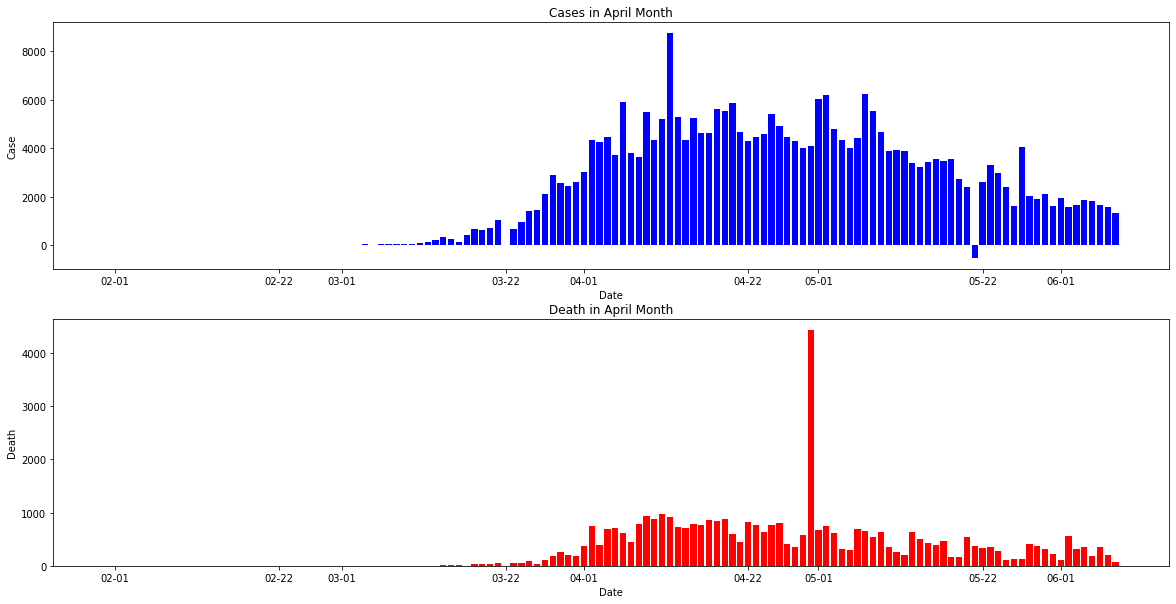

In [64]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.dates import DateFormatter
# Create figure and plot space
#plt.subplot(221)
fig, ax = plt.subplots(figsize=(20, 10))
ax1=plt.subplot(2, 1, 1)
# Add x-axis and y-axis
ax1.bar(df_UK['Date'],
       df_UK['New_cases'],
       color='blue')

# Set title and labels for axes
ax1.set(xlabel="Date",
       ylabel="Case",
       title="Cases in April Month")
# Define the date format
date_form = DateFormatter("%m-%d")
ax1.xaxis.set_major_formatter(date_form)


ax2=plt.subplot(2, 1, 2)
# Add x-axis and y-axis
ax2.bar(df_UK['Date'],
       df_UK['New_deaths'],
       color='red')

# Set title and labels for axes
ax2.set(xlabel="Date",
       ylabel="Death",
       title="Death in April Month")
# Define the date format
date_form = DateFormatter("%m-%d")
ax2.xaxis.set_major_formatter(date_form)

plt.show()
## Subplot of death and cases


From the above two plots we can say that our conclusion about the month of April for UK is nearly right. We can however see that there are some extra high count for death in the starting week of May. Also the death are not skewed which is opposite to the expected.

# Daily basis analysis

In [65]:
df_daily = df_f[['Country','New_cases','Cumulative_cases',
                 'New_deaths','Cumulative_deaths','Date','Month']]

In [66]:
df_daily['Day'] = df_daily.groupby('Country').cumcount() + 1
df_daily_day_not_index = df_daily.copy()
df_daily = df_daily.set_index('Day')
df_daily.head()

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Month
Day,,,,,,,
1,France,3,3,0,0,2020-01-24,Jan
2,France,0,3,0,0,2020-01-25,Jan
3,France,0,3,0,0,2020-01-26,Jan
4,France,0,3,0,0,2020-01-27,Jan
5,France,1,4,0,0,2020-01-28,Jan


## Total count of all cases and death in european region according to day

In [67]:
day_sum= df_daily.groupby(df_daily.index).sum()
day_sum.head()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Day,,,,
1,113,113,0,0
2,63,176,0,0
3,103,279,2,2
4,172,451,2,4
5,234,685,5,9


## Extracting the days for April month

In [68]:
df_april_days = df_daily_day_not_index.loc[df_daily_day_not_index['Month'] == 'Apr']
df_april_days.head()

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Month,Day
7387,Greece,102,1314,6,49,2020-04-01,Apr,36
1794,Belgium,876,12775,192,705,2020-04-01,Apr,58
9805,Jersey,0,63,0,2,2020-04-01,Apr,21
5822,Estonia,30,745,1,4,2020-04-01,Apr,35
8323,Holy See,0,6,0,0,2020-04-01,Apr,27


## Extracting data for UK for April

In [69]:
df_april_uk_daily = df_april_days.loc[df_april_days['Country'] == 'The United Kingdom']
df_april_uk_daily.head()

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Month,Day
18590,The United Kingdom,3009,25154,381,1789,2020-04-01,Apr,62
18591,The United Kingdom,4324,29478,743,2532,2020-04-02,Apr,63
18592,The United Kingdom,4244,33722,389,2921,2020-04-03,Apr,64
18593,The United Kingdom,4450,38172,684,3605,2020-04-04,Apr,65
18594,The United Kingdom,3735,41907,708,4313,2020-04-05,Apr,66


## Deaths and Cases in April for UK

In [70]:
print('The maximum cases were reported on the day:')

df_april_uk_daily.groupby(['Day']).New_cases.sum().idxmax()

The maximum cases were reported on the day:


73

In [71]:
print('The maximum deaths were reported on the day:')
df_april_uk_daily.groupby(['Day']).New_deaths.sum().idxmax()

The maximum deaths were reported on the day:


91

# Data Analysis Of Finland

## Extracting the Finland Data

In [72]:
df_Finland = df_daily_day_not_index.loc[df_daily_day_not_index['Country'] == 'Finland']

In [73]:
df_Finland.head()

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Date,Month,Day
6308,Finland,1,1,0,0,2020-01-29,Jan,1
6309,Finland,0,1,0,0,2020-01-30,Jan,2
6310,Finland,0,1,0,0,2020-01-31,Jan,3
6311,Finland,0,1,0,0,2020-02-01,Feb,4
6312,Finland,0,1,0,0,2020-02-02,Feb,5


## The information of Finland dataframe

In [74]:
df_Finland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 6308 to 6439
Data columns (total 8 columns):
Country              132 non-null object
New_cases            132 non-null int64
Cumulative_cases     132 non-null int64
New_deaths           132 non-null int64
Cumulative_deaths    132 non-null int64
Date                 132 non-null datetime64[ns]
Month                132 non-null object
Day                  132 non-null int64
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 9.3+ KB


## Statistics for Finland data

In [75]:
df_Finland.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day
count,132.000000,132.000000,132.000000,132.000000,132.000000
mean,52.886364,2670.803030,2.446970,105.810606,66.500000
std,57.407163,2693.879618,4.795536,128.632391,38.249183
min,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,6.750000,0.000000,0.000000,33.750000
50%,42.000000,1566.500000,1.000000,19.500000,66.500000
75%,85.750000,5452.250000,4.000000,247.500000,99.250000
max,267.000000,6981.000000,43.000000,323.000000,132.000000


## Total cases and death in Finland

In [76]:
df_Finland.groupby('Country')['New_cases', 'New_deaths'].sum()

,New_cases,New_deaths
Country,,
Finland,6981,323


## Month in which Finland is most affected

In [77]:
df_month_Finland = df_Finland.resample('M', on='Date').mean().sort_values('New_cases',
                                                                    ascending = False)
df_month_Finland

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day
Date,,,,,
2020-04-30,119.766667,3195.400000,6.433333,89.000000,78.5
2020-05-31,61.935484,6088.838710,3.548387,279.838710,109.0
2020-03-31,42.290323,405.000000,0.419355,1.677419,48.0
2020-06-30,19.375000,6917.375000,0.875000,321.250000,128.5
2020-01-31,0.333333,1.000000,0.000000,0.000000,2.0
2020-02-29,0.034483,1.137931,0.000000,0.000000,18.0


In [78]:
cm_finland = sns.light_palette("deeppink", as_cmap=True)

month_Finland = df_month_Finland.style.background_gradient(cmap=cm_finland)
month_Finland

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Day
Date,,,,,
2020-04-30 00:00:00,119.767,3195.4,6.43333,89,78.5
2020-05-31 00:00:00,61.9355,6088.84,3.54839,279.839,109
2020-03-31 00:00:00,42.2903,405,0.419355,1.67742,48
2020-06-30 00:00:00,19.375,6917.38,0.875,321.25,128.5
2020-01-31 00:00:00,0.333333,1,0,0,2
2020-02-29 00:00:00,0.0344828,1.13793,0,0,18


Here also we see that April month contain the most cases and death

## Daily Analysis for Finland

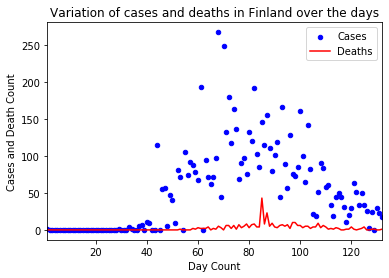

In [79]:
ax = df_Finland.plot(kind="scatter", x="Day",y="New_cases", color="b", label="Cases")
df_Finland.plot(x="Day",y="New_deaths", color="r", label="Deaths", ax=ax)


ax.set_xlabel("Day Count")
ax.set_ylabel("Cases and Death Count")
ax.set_title('Variation of cases and deaths in Finland over the days')
plt.show()

In [80]:
print('The maximum cases were reported on the day:')

df_Finland.groupby(['Day']).New_cases.sum().idxmax()

The maximum cases were reported on the day:


68

In [81]:
print('The maximum deaths were reported on the day:')

df_Finland.groupby(['Day']).New_deaths.sum().idxmax()

The maximum deaths were reported on the day:


85

## Plotting cases of finland with europe

In [82]:
day_sum.index = day_sum.index.map(int)

In [83]:
df_Finland_day_index = df_Finland.set_index('Day')

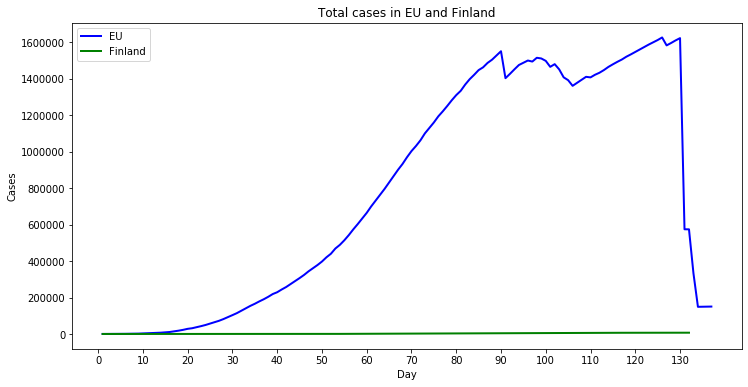

In [84]:
fig, ax1 = plt.subplots()
ax1.plot(day_sum["Cumulative_cases"],
         color='b',
         lw=2,
         label='EU');
ax1.plot(df_Finland_day_index["Cumulative_cases"],
         lw=2,
         color='g',
         label='Finland');
fig.set_size_inches(w=12, h=6)
ax1.set_ylabel('Cases')
ax1.set_xlabel('Day')
plt.title('Total cases in EU and Finland')
plt.xticks(list(range(0, day_sum.index.max(),10)))
ax1.legend(loc='upper left');

## Plotting with twin x-axis

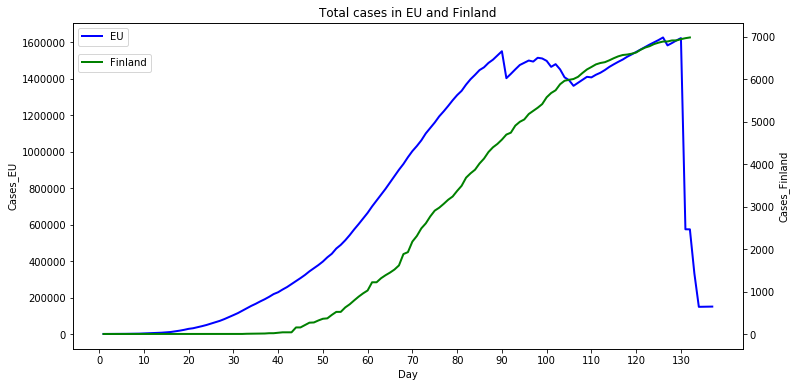

In [85]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(day_sum["Cumulative_cases"],
         color='b',
         lw=2,
         label='EU');
ax2.plot(df_Finland_day_index["Cumulative_cases"],
         color='g',
         lw=2,
         label='Finland');
fig.set_size_inches(w=12, h=6)
ax1.set_ylabel('Cases_EU')
ax1.set_xlabel('Day')
ax2.set_ylabel('Cases_Finland')
plt.title('Total cases in EU and Finland')
plt.xticks(list(range(0,day_sum.index.max(),10)))
ax1.legend(loc='upper left')
ax2.legend(loc='upper left',bbox_to_anchor=(0,0.92));

## Plotting the death cases in Finland to EU countries

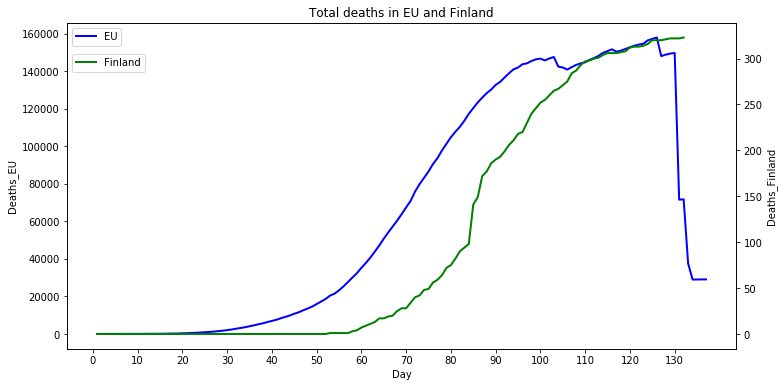

In [86]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(day_sum["Cumulative_deaths"],
         color='b',
         lw=2,
         label='EU');
ax2.plot(df_Finland_day_index["Cumulative_deaths"],
         color='g',
         lw=2,
         label='Finland');
fig.set_size_inches(w=12, h=6)
ax1.set_ylabel('Deaths_EU')
ax1.set_xlabel('Day')
ax2.set_ylabel('Deaths_Finland')
plt.title('Total deaths in EU and Finland')
plt.xticks(list(range(0,day_sum.index.max(),10)));
ax1.legend(loc='upper left')
ax2.legend(loc='upper left',bbox_to_anchor=(0,0.92));

# Total Recover

## Creating recover cases column

In [87]:
df_recover = df_f[['Date','Country', 'New_cases', 'New_deaths']]
df_recover.head()

,Date,Country,New_cases,New_deaths
6440,2020-01-24,France,3,0
6441,2020-01-25,France,0,0
6442,2020-01-26,France,0,0
6443,2020-01-27,France,0,0
6444,2020-01-28,France,1,0


In [88]:
df_recover['Recover'] = df_f['New_cases'] - df_f['New_deaths']
df_recover.head()

/home/smruti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Country,New_cases,New_deaths,Recover
6440,2020-01-24,France,3,0,3
6441,2020-01-25,France,0,0,0
6442,2020-01-26,France,0,0,0
6443,2020-01-27,France,0,0,0
6444,2020-01-28,France,1,0,1


## Static analysis of recovery column

In [89]:
df_recover.describe()

,New_cases,New_deaths,Recover
count,6163.000000,6163.000000,6163.000000
mean,371.014117,29.875061,341.139056
std,1182.703184,129.305612,1112.219871
min,-840.000000,-1918.000000,-947.000000
25%,1.000000,0.000000,1.000000
50%,21.000000,0.000000,20.000000
75%,161.000000,5.000000,151.500000
max,12559.000000,4419.000000,12446.000000


## Plotting recovered cases Over Time

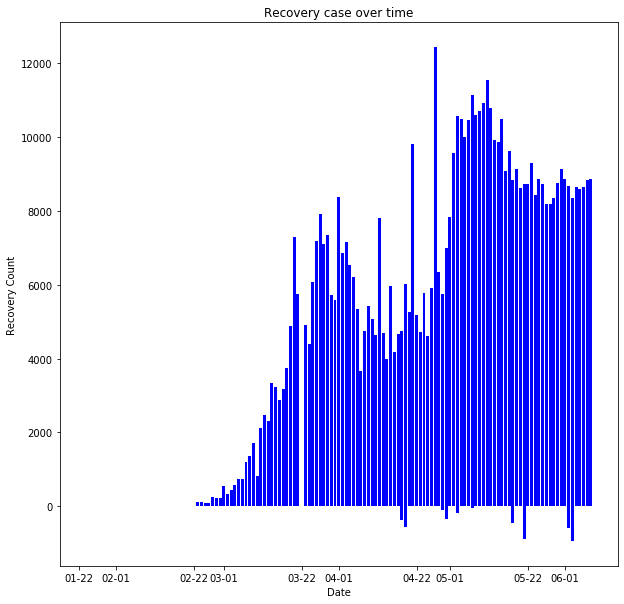

In [94]:
from matplotlib.dates import DateFormatter
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(df_recover['Date'],
       df_recover["Recover"],
       color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Recovery Count",
       title="Recovery case over time")
# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.show()

# Nordic Countries Analysis

In [91]:
nordic_countries=["Finland","Sweden","Norway","Denmark","Iceland"]
nordic_countries_color={"Finland":"g",
                        "Sweden":"m",
                       "Norway":"y",
                       "Denmark":"c",
                       "Iceland":"r"}

## Plotting the cases of Nordic and EU countries

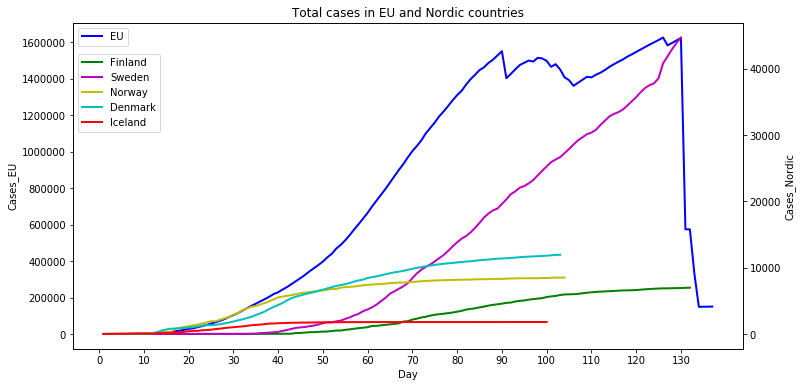

In [92]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(day_sum["Cumulative_cases"],
         color='b',
         lw=2,
         label='EU');
for country in nordic_countries:
    country_case_data = df_daily[df_daily['Country']  == country]
    ax2.plot(country_case_data["Cumulative_cases"],
             lw=2,
             color=nordic_countries_color[country],
             label=country)
fig.set_size_inches(w=12, h=6)
ax1.set_ylabel('Cases_EU')
ax1.set_xlabel('Day')
ax2.set_ylabel('Cases_Nordic')
plt.title('Total cases in EU and Nordic countries')
plt.xticks(list(range(0,day_sum.index.max(),10)));
ax1.legend(loc='upper left')
ax2.legend(loc='upper left',bbox_to_anchor=(0,0.92));

## Plotting death in Nordic and EU countries

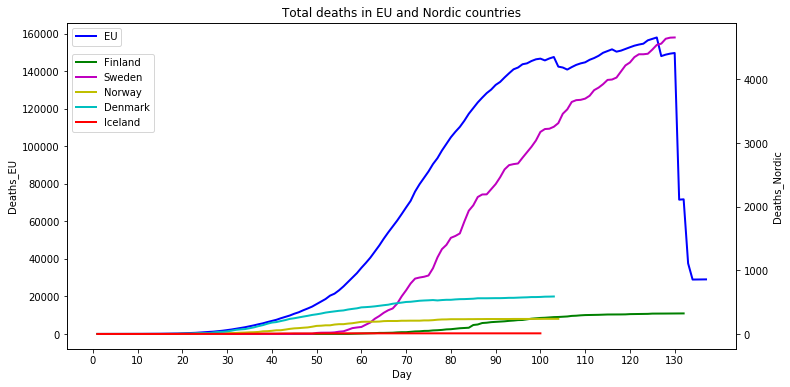

In [93]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(day_sum["Cumulative_deaths"],
         color='b',
         lw=2,
         label='EU');
for country in nordic_countries:
    country_case_data = df_daily[df_daily['Country']  == country]
    ax2.plot(country_case_data["Cumulative_deaths"],
             lw=2,
             color=nordic_countries_color[country],
             label=country)
fig.set_size_inches(w=12, h=6)
ax1.set_ylabel('Deaths_EU')
ax1.set_xlabel('Day')
ax2.set_ylabel('Deaths_Nordic')
plt.title('Total deaths in EU and Nordic countries')
plt.xticks(list(range(0,day_sum.index.max(),10)));
ax1.legend(loc='upper left')
ax2.legend(loc='upper left',bbox_to_anchor=(0,0.92));